### Final Project

Can we predict between the number of immigration using the average 
yearly exchange rate of that year? (in terms of hypothesis testing)
 
Is there a correlation between the rate of immigration and the average currency exchange rates between two given counties? If there is a correlation, then how can we explain it and can we fit it into a model (and possibly predict)?

We get our data of number of immigration between two countries from 

https://www.migrationdataportal.org/data?i=stock_perc_&t=2019
https://www.un.org/en/development/desa/population/migration/data/estimates2/estimates19.asp

In [2]:
import pandas as pd
import numpy as np
import math

In [10]:
df = pd.read_excel("UN_MigrantStockByOriginAndDestination_2019.xlsx", sheet_name = 1, skiprows = 14)

In [12]:
df.head()

,Year,Sort\norder,"Major area, region, country or area of destination",Notes,Code,Type of data (a),Unnamed: 6,Unnamed: 7,Unnamed: 8,Country or area of origin,...,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240
0,NaN,NaN,NaN,NaN,NaN,NaN,Total,Other South,Other North,Afghanistan,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
1,1990.0,1990001.0,WORLD,NaN,900.0,NaN,153011473,6548526,2366800,6823350,...,237486,1428020,5060,185946,1237873,6484,168239,455492,85203,204365
2,1990.0,1990002.0,UN development groups,NaN,NaN,NaN,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,1990.0,1990003.0,More developed regions,b,901.0,NaN,82767216,3385103,1077179,119386,...,56838,1078563,1017,114991,1085310,884,333,11457,26062,40957
4,1990.0,1990004.0,Less developed regions,c,902.0,NaN,70244257,3163423,1289621,6703964,...,180648,349457,4043,70955,152563,5600,167906,444035,59141,163408


We can see that we have a **messy data** with the **column names not desired** because of the way Excel has larger columns and sub columns, so let's start with cleaning up our data!

In [20]:
new_columns = []
for i in range(len(df.columns)):
    if df.columns[i].startswith("Unnamed"):
        new_columns.append(df.iloc[0][i])
    else: new_columns.append(df.columns[i])
df.columns = new_columns

In [21]:
df.head()

,Year,Sort\norder,"Major area, region, country or area of destination",Notes,Code,Type of data (a),Total,Other South,Other North,Country or area of origin,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,Total,Other South,Other North,Afghanistan,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
1,1990.0,1990001.0,WORLD,NaN,900.0,NaN,153011473,6548526,2366800,6823350,...,237486,1428020,5060,185946,1237873,6484,168239,455492,85203,204365
2,1990.0,1990002.0,UN development groups,NaN,NaN,NaN,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,1990.0,1990003.0,More developed regions,b,901.0,NaN,82767216,3385103,1077179,119386,...,56838,1078563,1017,114991,1085310,884,333,11457,26062,40957
4,1990.0,1990004.0,Less developed regions,c,902.0,NaN,70244257,3163423,1289621,6703964,...,180648,349457,4043,70955,152563,5600,167906,444035,59141,163408


Let's first look at the migrant stock from:
* US to Canada (`sub_df1`)
* Canada to US (`sub_df2`)
* US to Mexico (`sub_df3`)
* Mexico to US (`sub_df4`)

In order to do this, we select from our big dataframe the necessary information to create a sub dataframe. We name the sub dataframes that contains the necessary information as above.

In [27]:
sub_df = df[["Year", "Major area, region, country or area of destination",
             "Canada", "United States of America", "Mexico"]]
sub_df.head()

,Year,"Major area, region, country or area of destination",Canada,United States of America,Mexico
0,NaN,NaN,Canada,United States of America,Mexico
1,1990.0,WORLD,998163,1739233,4395365
2,1990.0,UN development groups,..,..,..
3,1990.0,More developed regions,938586,889414,4350586
4,1990.0,Less developed regions,59577,849819,44779


In [34]:
sub_df1 = sub_df[["Year", "Major area, region, country or area of destination",
                  "United States of America"]]
sub_df1 = sub_df1[sub_df1["Major area, region, country or area of destination"] ==  "Canada"]
sub_df1 = sub_df1.reset_index(drop = True)
sub_df1

,Year,"Major area, region, country or area of destination",United States of America
0,1990.0,Canada,238998
1,1995.0,Canada,244567
2,2000.0,Canada,255952
3,2005.0,Canada,273338
4,2010.0,Canada,263470
5,2015.0,Canada,252159
6,2019.0,Canada,270217


In [35]:
sub_df2 = sub_df[["Year", "Major area, region, country or area of destination",
                  "Canada"]]
sub_df2 = sub_df2[sub_df2["Major area, region, country or area of destination"] ==  "United States of America"]
sub_df2 = sub_df2.reset_index(drop = True)
sub_df2

,Year,"Major area, region, country or area of destination",Canada
0,1990.0,United States of America,744830
1,1995.0,United States of America,793278
2,2000.0,United States of America,841612
3,2005.0,United States of America,842344
4,2010.0,United States of America,868967
5,2015.0,United States of America,830628
6,2019.0,United States of America,825040


In [36]:
sub_df3 = sub_df[["Year", "Major area, region, country or area of destination",
                  "United States of America"]]
sub_df3 = sub_df3[sub_df3["Major area, region, country or area of destination"] ==  "Mexico"]
sub_df3 = sub_df3.reset_index(drop = True)
sub_df3

,Year,"Major area, region, country or area of destination",United States of America
0,1990.0,Mexico,198230
1,1995.0,Mexico,272472
2,2000.0,Mexico,358399
3,2005.0,Mexico,520053
4,2010.0,Mexico,741918
5,2015.0,Mexico,739362
6,2019.0,Mexico,762290


In [37]:
sub_df4 = sub_df[["Year", "Major area, region, country or area of destination",
                  "Mexico"]]
sub_df4 = sub_df4[sub_df4["Major area, region, country or area of destination"] ==  "United States of America"]
sub_df4 = sub_df4.reset_index(drop = True)
sub_df4

,Year,"Major area, region, country or area of destination",Mexico
0,1990.0,United States of America,4298014
1,1995.0,United States of America,6827945
2,2000.0,United States of America,9410529
3,2005.0,United States of America,10611064
4,2010.0,United States of America,12168662
5,2015.0,United States of America,11643298
6,2019.0,United States of America,11489684


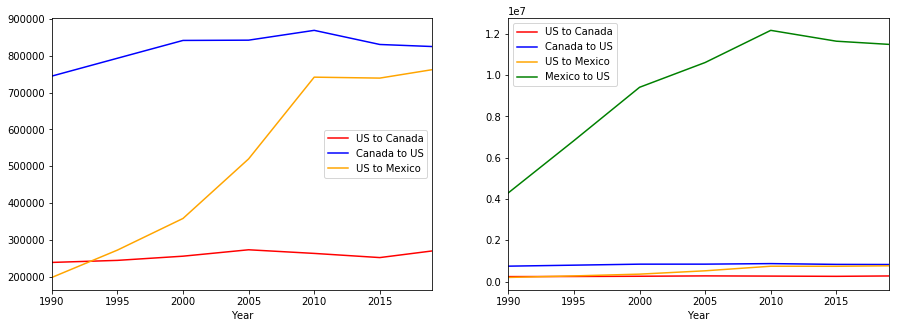

In [58]:
import matplotlib.pyplot as plt
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,5))
sub_df1.plot(kind='line',x='Year',y='United States of America', color='red',ax=ax)
sub_df2.plot(kind='line',x='Year',y='Canada', color='blue', ax=ax)
sub_df3.plot(kind='line',x='Year',y='United States of America', color='orange', ax=ax)

sub_df1.plot(kind='line',x='Year',y='United States of America', color='red',ax=ax2)
sub_df2.plot(kind='line',x='Year',y='Canada', color='blue', ax=ax2)
sub_df3.plot(kind='line',x='Year',y='United States of America', color='orange', ax=ax2)
sub_df4.plot(kind='line',x='Year',y='Mexico', color='green', ax=ax2)
ax.legend(["US to Canada", "Canada to US", "US to Mexico"])
ax2.legend(["US to Canada", "Canada to US", "US to Mexico", "Mexico to US"])

plt.show()

Note: Because the number of immigration from Mexico to US is significantly larger than the other three, we made two plots just to make the distinguish between the other three lines (the blue, yellow and red lines).